In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import mglearn
import copy
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
url = 'https://raw.githubusercontent.com/rashida048/Datasets/master/mushrooms.csv'
data = pd.read_csv(url, index_col = 0)

In [3]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
e,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
e,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, p to e
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring    8124 n

In [5]:
for col in data.columns:
    print(col, data[col].unique())

cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


As we can see veil-type has only one value, let's dop the fetature

In [6]:
data.drop('veil-type', axis = 1, inplace = True)

Data is quite clean, the only thing needed is an encoding

In [7]:
data_encoder = OrdinalEncoder()
target_encoder = LabelEncoder()
values = data_encoder.fit_transform(data.values)
target = target_encoder.fit_transform(data.index)
data_encoded = pd.DataFrame(values, target, columns = data.columns)
data_encoded.index.name = data.index.name

Data split and checking correlations

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(data_encoded.values, data_encoded.index)
train_set = pd.DataFrame(xtrain, ytrain, columns = data_encoded.columns)

<AxesSubplot:>

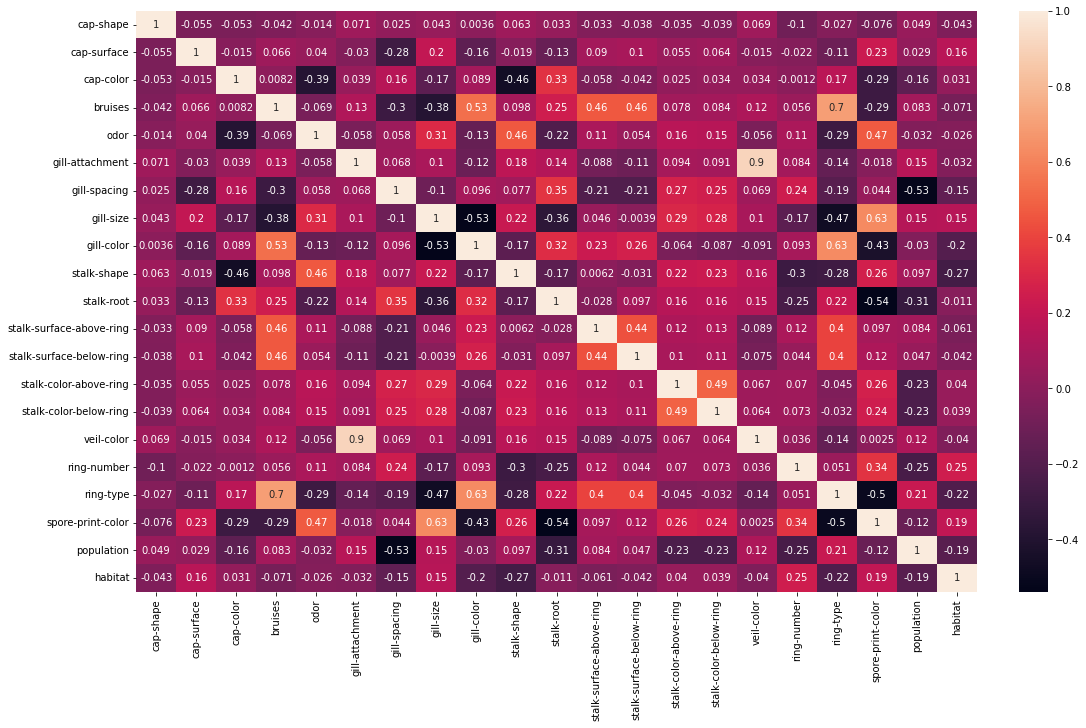

In [9]:
corr = train_set.corr()
sns.heatmap(corr, annot = True)

There are a bounch of high correlations between features, let's see how a baseline neural network performs.
<br>
First we fit a scaler on training set

In [10]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

Baseline Neural Network

In [11]:
#Neural Network
RegularizedDense = partial(keras.layers.Dense,
                           activation="selu",
                           kernel_initializer="lecun_normal",
                           #kernel_regularizer=keras.regularizers.l2(0.001)
                          )

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
kf = StratifiedKFold(n_splits = 3)

acc = [[],[]]
for train, valid in kf.split(xtrain_scaled, ytrain):
                
    neural = keras.models.Sequential([
        keras.layers.InputLayer(input_shape = train_set.shape[1]),
        RegularizedDense(150),
        RegularizedDense(70),
        RegularizedDense(35),
        keras.layers.Dense(len(np.unique(data_encoded.index)), activation = 'softmax')])

    neural.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    history = neural.fit(xtrain_scaled[train], ytrain[train],
                        validation_data = (xtrain_scaled[valid], ytrain[valid]),
                        epochs = 10,
                        callbacks = [callback],
                        verbose = 0)
    acc[0].append(max(list(history.history['accuracy'])))
    acc[1].append(max(list(history.history['val_accuracy'])))
                    
score = pd.DataFrame({'train_score':np.mean(acc[0]), 'valid_score':np.mean(acc[1])}, [0])

In [12]:
neural.evaluate(xtest_scaled, ytest)
score

64/64 [==============================] - 0s 3ms/step - loss: 7.4188e-04 - accuracy: 1.0000


,train_score,valid_score
0,1.0,1.0


64/64 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       998

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



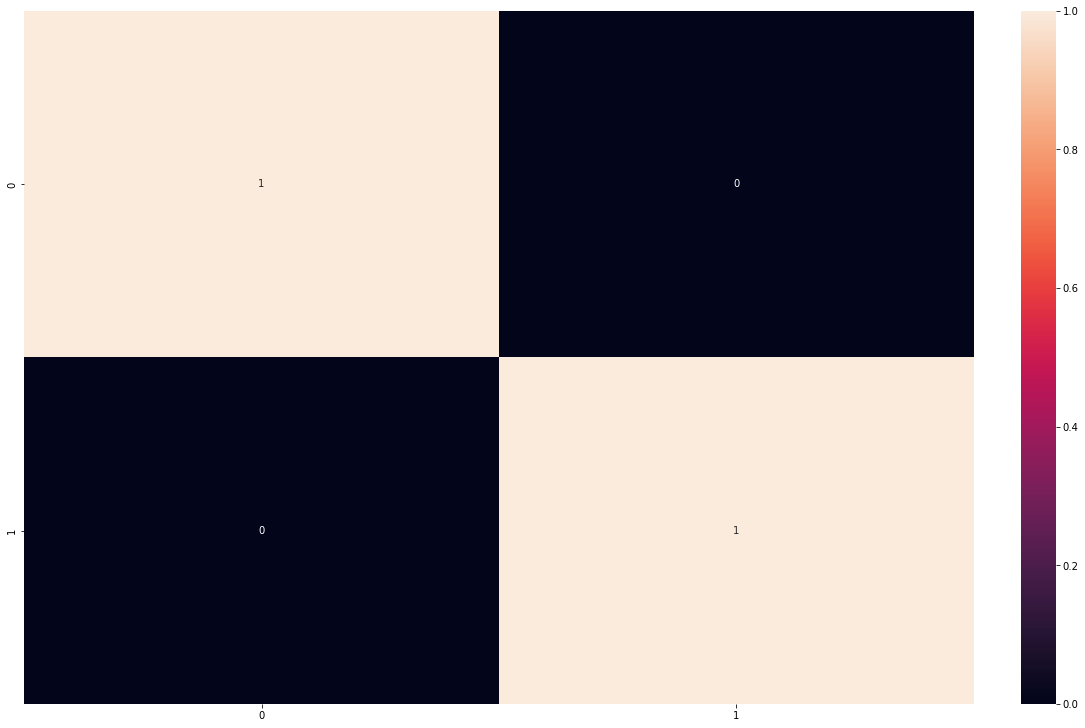

In [14]:
y_pred = np.argmax(neural.predict(xtest_scaled), axis=-1)
cm = confusion_matrix(ytest, y_pred, normalize='true')
sns.heatmap(cm, annot=True)
print(classification_report(ytest, y_pred))

The baseline model achieve perfection on this dataset.
<br>
It is kinda expected because nobody dies anymore from mushroom's poisoning, this means that humans achieved 100% accuracy on recognizing poisonus species.
<br>
Also due to the clean dataset, the model can achieve the same performance, of course.